In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import random
import math

**Zadanie 1**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


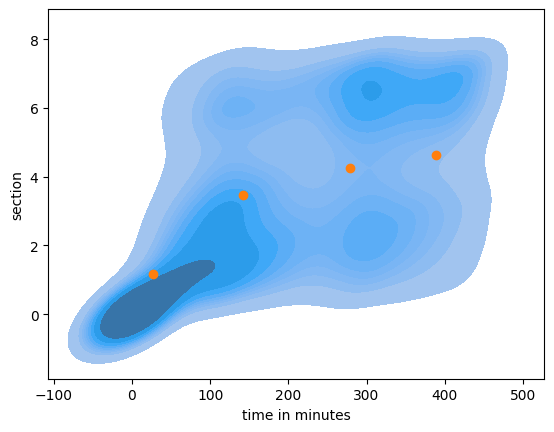

In [2]:
data = pd.read_csv('press_readers_chicago.csv', sep=';')
model = KMeans(n_clusters=4)
model.fit(data) 
sns.kdeplot(data = data, x = "time in minutes", y = "section", fill = True)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 2] [[0.31743212 0.71327074]
 [0.70566179 0.34514436]
 [0.13325352 0.12498005]
 [0.81757024 0.88603087]]


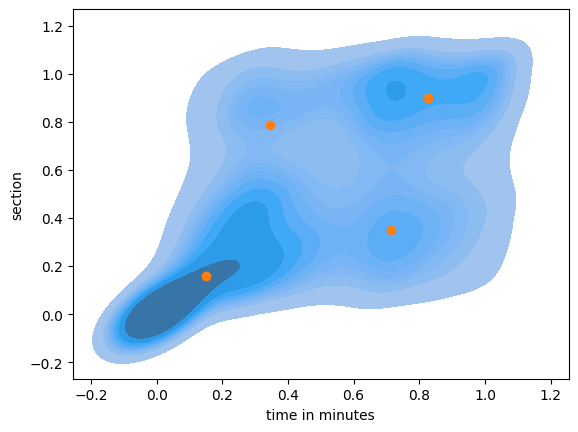

In [3]:
data = pd.read_csv('press_readers_chicago.csv', sep=';')
model = KMeans(n_clusters=4)
data=(data-data.min())/(data.max()-data.min())
model.fit(data)
sns.kdeplot(data = data, x = "time in minutes", y = "section", fill = True)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1])

data = pd.read_csv('press_readers_chicago.csv', sep=';')
data.loc[len(data)] = [300,4]
data.loc[len(data)] = [10,2]
data.loc[len(data)] = [100,1]
model = KMeans(n_clusters=4)
data=(data-data.min())/(data.max()-data.min())
model.fit(data)
print(model.labels_[-3:], model.cluster_centers_)

**Zadanie 2**

In [4]:
# KMeans
data = pd.read_csv('planets.csv')
labels = data.iloc[:,0]
data = data.iloc[:,1:]
model = KMeans(n_clusters=5)
max_data = data.max(axis=0)
data/=data.max(axis=0)
model.fit(data)

for i in model.cluster_centers_:
  print(np.multiply(i, max_data))

print(metrics.silhouette_score(data, model.labels_))
print(metrics.davies_bouldin_score(data, labels))
print(metrics.rand_score(labels, model.labels_))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


pl_orbper         7.656822
pl_orbsmax        0.064265
pl_rade          12.106687
pl_masse        379.928012
pl_orbeccen       0.044540
pl_eqt         1199.752033
st_teff        5400.545528
st_mass           0.960650
sy_dist         400.717272
dtype: float64
pl_orbper         3.233207
pl_orbsmax        0.046574
pl_rade          16.585698
pl_masse        612.435886
pl_orbeccen       0.041242
pl_eqt         1852.281407
st_teff        6344.337839
st_mass           1.345628
sy_dist         494.283200
dtype: float64
pl_orbper        18.736730
pl_orbsmax        0.115043
pl_rade           3.218233
pl_masse         18.653262
pl_orbeccen       0.068975
pl_eqt         1040.957055
st_teff        5460.024540
st_mass           0.950491
sy_dist         195.713267
dtype: float64
pl_orbper       132.139992
pl_orbsmax        0.305462
pl_rade          11.382984
pl_masse       1011.819609
pl_orbeccen       0.403852
pl_eqt         1010.265625
st_teff        5776.000000
st_mass           1.132812
sy_dist   

In [5]:
# Agglomerative clustering
model = AgglomerativeClustering(n_clusters = 4)
model.fit(data)

print(metrics.silhouette_score(data, model.labels_))
print(metrics.davies_bouldin_score(data, labels))
print(metrics.rand_score(labels, model.labels_))

0.27407365866555633
0.8605273299250099
0.6949112167621165


In [14]:
model = DBSCAN(eps=0.1)
model.fit(data)
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_noise_ = list(model.labels_).count(-1)
print('Liczba klastrów wytworzona przez algorytm w procesie uczenia: %d' % n_clusters_)
print('           ')
print('Liczba wskazanych przez algorytm punktów szumu: %d' % n_noise_)

Liczba klastrów wytworzona przez algorytm w procesie uczenia: 3
           
Liczba wskazanych przez algorytm punktów szumu: 241


**Zadanie 3**

In [7]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=9d70bcaf3cd7b2b67119f1498a632c1b36cdaab24a29240437a023aa79f8d9a4
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [17]:
import skfuzzy as fuzz
all_data = np.vstack((data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], data.iloc[:,4]))

# stworzenie modelu c-means dla powyższych danych oraz 4 klastrów
cntr, u_orig, u0, d, jm, p, fpc  = fuzz.cluster.cmeans(
    all_data, 4, 2, error=0.005, maxiter=1000)

fig2, ax2 = plt.subplots()
ax2.set_title('Etykiety nadane przez c-means')
for j in range(4):
    ax2.plot(all_data[0, u_orig.argmax(axis=0) == j],
             all_data[1, u_orig.argmax(axis=0) == j], 'o',
             label='Klaster ' + str(j))
ax2.legend()
plt.xlabel('okres orbitalny')
plt.ylabel('półoś wielka')
plt.savefig('1.png')
plt.close() 

fig2, ax2 = plt.subplots()
ax2.set_title('Etykiety nadane przez c-means')
for j in range(4):
    ax2.plot(all_data[0, u_orig.argmax(axis=0) == j],
             all_data[1, u_orig.argmax(axis=0) == j], 'o',
             label='Klaster ' + str(j))
ax2.legend()
plt.xlim([0, 0.1])
plt.ylim([0, 0.3])
plt.xlabel('okres orbitalny')
plt.ylabel('półoś wielka')
plt.savefig('1b.png')
plt.close() 


fig2, ax2 = plt.subplots()
ax2.set_title('Etykiety nadane przez c-means')
for j in range(4):
    ax2.plot(all_data[2, u_orig.argmax(axis=0) == j],
             all_data[3, u_orig.argmax(axis=0) == j], 'o',
             label='Klaster ' + str(j))
ax2.legend()
plt.xlabel('promień planety')
plt.ylabel('ekscentryczność')
plt.savefig('2.png')
plt.close()

**Zadanie 4**

In [9]:
firstCluster = [[i/1000, math.sin(i/300.0+1.5)+ random.uniform(-0.1, 0.1)] for i in range(-500, 500)]
secondCluster = [[i/1000, math.sin(i/300.0+3)+random.uniform(-0.1,0.1)] for i in range(1000)]
all_data = firstCluster + secondCluster

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


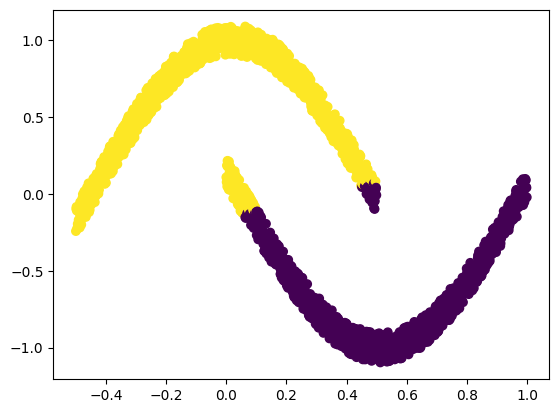

In [10]:
model = KMeans(n_clusters=2)
model.fit(all_data)

x = [i[0] for i in all_data]
y = [i[1] for i in all_data]

plt.scatter(x, y, c=model.labels_)
plt.show()

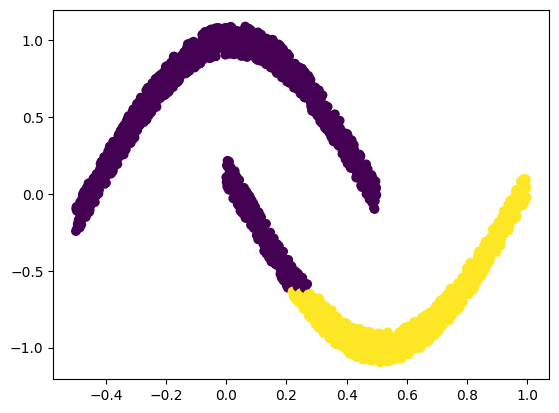

In [11]:
# Agglomerative clustering
model = AgglomerativeClustering(n_clusters = 2)
model.fit(all_data)

x = [i[0] for i in all_data]
y = [i[1] for i in all_data]

plt.scatter(x, y, c=model.labels_)
plt.show()

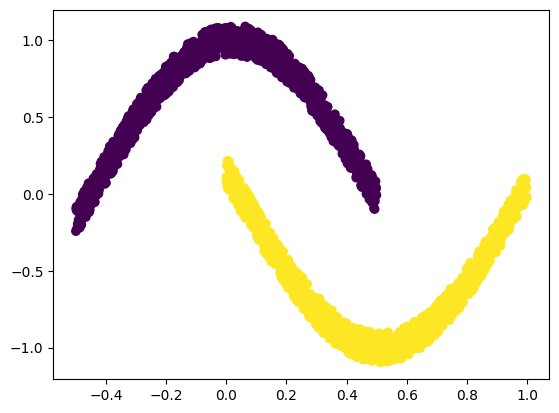

In [12]:
model = DBSCAN(eps=0.1, min_samples=7)
model.fit(all_data)

x = [i[0] for i in all_data]
y = [i[1] for i in all_data]

plt.scatter(x, y, c=model.labels_)
plt.show()